In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("namargb.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
(baris, kolom) = img.shape[:2]

In [4]:
biru = img[:, :, 0]
hijau = img[:, :, 1]
merah = img[:, :, 2]

In [5]:
_, merah_binary = cv2.threshold(merah, 200, 255, cv2.THRESH_BINARY)
_, hijau_binary = cv2.threshold(hijau, 100, 255, cv2.THRESH_BINARY)
_, biru_binary = cv2.threshold(biru, 120, 255, cv2.THRESH_BINARY)

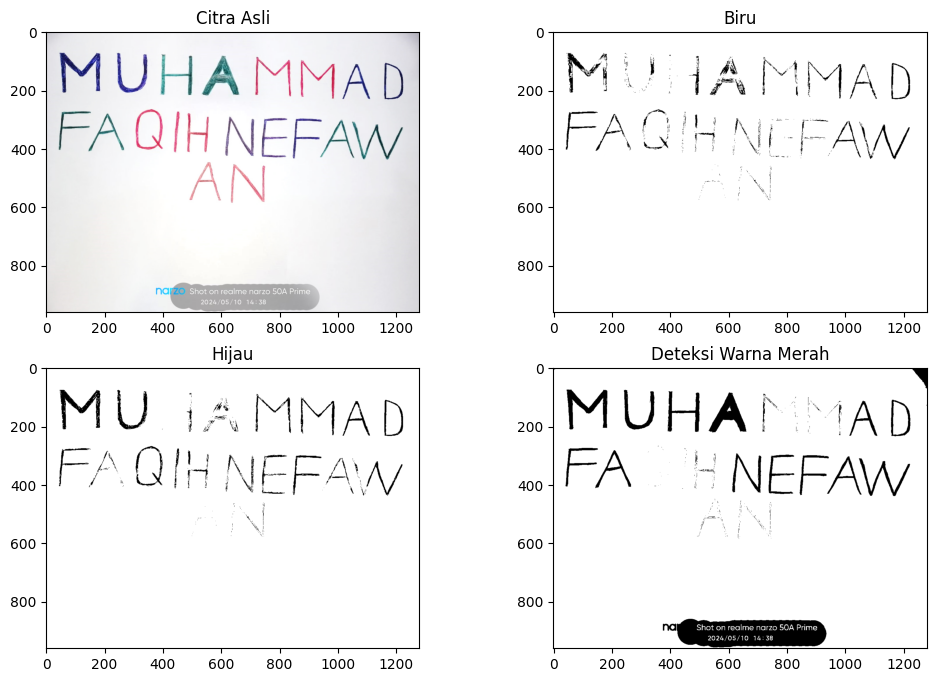

In [6]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
axs[0, 0].imshow(rgbimg)
axs[0, 0].set_title('Citra Asli')

axs[0, 1].imshow(biru_binary, cmap='gray')
axs[0, 1].set_title('Biru')

axs[1, 0].imshow(hijau_binary, cmap='gray')
axs[1, 0].set_title('Hijau')

axs[1, 1].imshow(merah_binary, cmap='gray')
axs[1, 1].set_title('Deteksi Warna Merah')

plt.show()

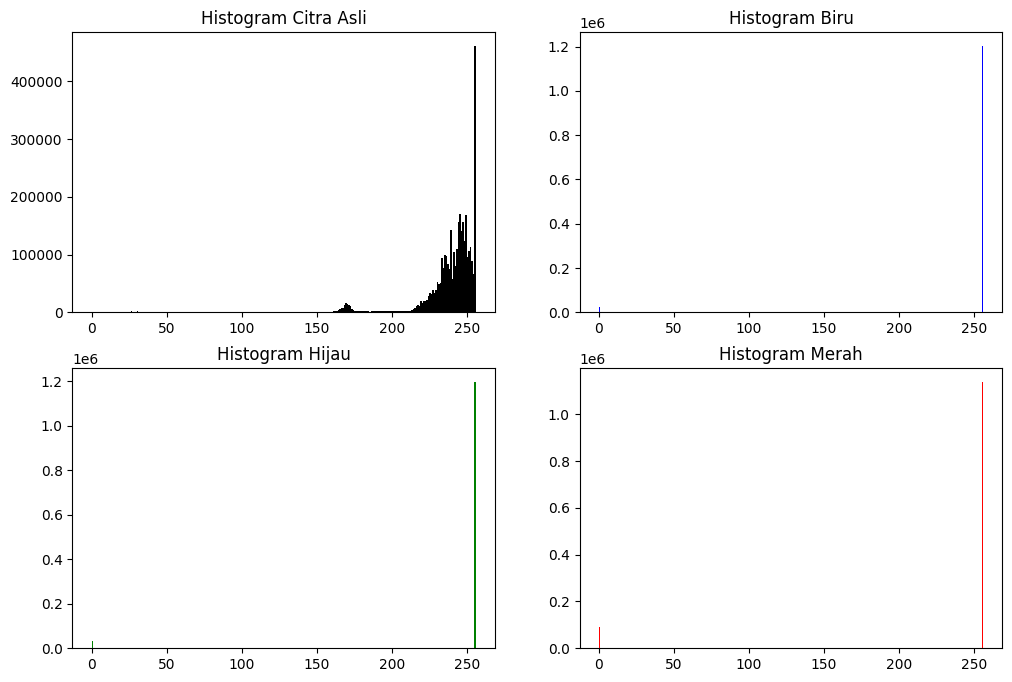

In [7]:
fig, axs = plt.subplots(2,2, figsize=(12,8),)
axs[0, 0].hist(rgbimg.ravel(),256,[0,256], color='black')
axs[0, 0].set_title('Histogram Citra Asli')

axs[0, 1].hist(biru_binary.ravel(), 256, [0, 256], color='blue')
axs[0, 1].set_title('Histogram Biru')

axs[1, 0].hist(hijau_binary.ravel(), 256, [0, 256], color='green')
axs[1, 0].set_title('Histogram Hijau')

axs[1, 1].hist(merah_binary.ravel(), 256, [0, 256], color='red')
axs[1, 1].set_title('Histogram Merah')

plt.show()

In [8]:
_, thresh_merah = cv2.threshold(merah_binary, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
_, thresh_biru = cv2.threshold(biru_binary, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
_, thresh_hijau = cv2.threshold(hijau_binary, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

thresh_red_blue = cv2.bitwise_or(thresh_merah, thresh_biru)
thresh_red_green_blue = cv2.bitwise_or(cv2.bitwise_or(thresh_merah, thresh_biru), thresh_hijau)

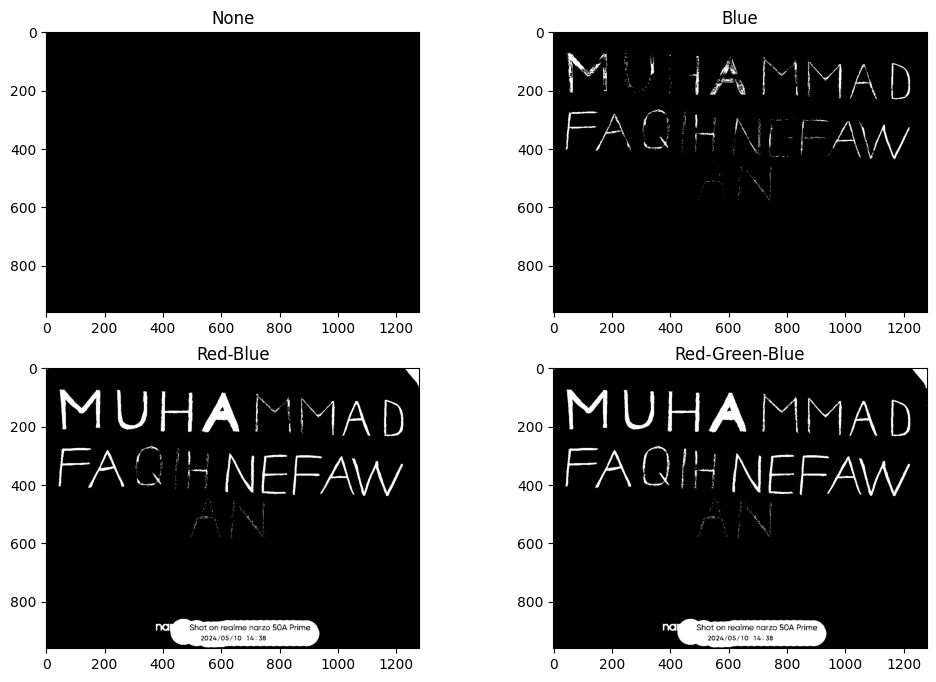

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

none_img = np.zeros_like(thresh_biru)
axs[0, 0].imshow(none_img, cmap='gray')
axs[0, 0].set_title('None')

axs[0, 1].imshow(thresh_biru, cmap='gray')
axs[0, 1].set_title('Blue')

axs[1, 0].imshow(thresh_red_blue, cmap='gray')
axs[1, 0].set_title('Red-Blue')

axs[1, 1].imshow(thresh_red_green_blue, cmap='gray')
axs[1, 1].set_title('Red-Green-Blue')

plt.show()